<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Proyecto del curso - Clasificación de flechas de arquería</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ana Sofía Aponte Barriga<br>David Felipe Silva Chacón</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Septiembre de 2022</p>

In [ ]:
!pip install opencv-python
!pip install matplotlib

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import math as m
import random

In [10]:
def plot(pic,title='',color=False):
    if color:
        plt.imshow(pic)
    else:
        plt.imshow(pic,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

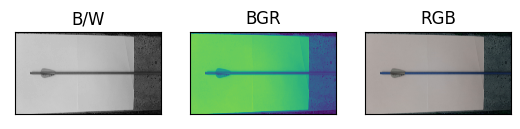

In [17]:
img1 = cv2.imread('img/20220913_121845.jpg',0)
img = cv2.imread('img/20220913_121845.jpg',1)
plt.subplot(131),plot(img1,'B/W', 0)
plt.subplot(132),plot(img1, 'BGR', 1)
plt.subplot(133),plot(img, 'RGB')
plt.show()